In [17]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

In [1]:
#loading the datset
import pandas as pd

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [2]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Analysis of the dataset

In [3]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
train_missing = train_data.isnull().sum()

In [6]:
train_missing

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Categorical Variables Analysis

In [7]:
print("\n--- Unique values in categorical columns ---")
categorical_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 
                   'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(train_data[col].value_counts())


--- Unique values in categorical columns ---

Item_Fat_Content value counts:
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

Item_Type value counts:
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

Outlet_Identifier value counts:
Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

Outlet_Size value counts:
Outlet_Size
Me

Analyzing Item_Identifier

In [8]:
print("\n--- Item Identifier Analysis ---")
# Extract prefix from Item_Identifier
train_data['Item_Identifier_Prefix'] = train_data['Item_Identifier'].apply(lambda x: x[:2])
test_data['Item_Identifier_Prefix'] = test_data['Item_Identifier'].apply(lambda x: x[:2])


--- Item Identifier Analysis ---


In [10]:
train_data['Item_Identifier_Prefix'].value_counts()

Item_Identifier_Prefix
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

In [11]:
prefix_type_crosstab = pd.crosstab(train_data['Item_Identifier_Prefix'], train_data['Item_Type'])
prefix_type_crosstab

Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Item_Identifier_Prefix,,,,,,,,,,,,,,,,
DR,0,0,0,0,140,0,0,214,0,0,0,0,0,0,445,0
FD,648,251,110,649,542,856,1232,0,0,0,425,0,64,1200,0,148
NC,0,0,0,0,0,0,0,0,520,910,0,169,0,0,0,0


In [12]:
#standardising the Item_Fat_Content
fat_content_mapping = {
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'
}

In [13]:
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace(fat_content_mapping)
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace(fat_content_mapping)

train_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [14]:
fat_type_crosstab = pd.crosstab(train_data['Item_Type'], train_data['Item_Fat_Content'])
fat_type_crosstab

Item_Fat_Content,Low Fat,Regular
Item_Type,,
Baking Goods,329,319
Breads,140,111
Breakfast,41,69
Canned,341,308
Dairy,418,264
Frozen Foods,450,406
Fruits and Vegetables,630,602
Hard Drinks,214,0
Health and Hygiene,520,0


In [15]:
numerical_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 
                 'Outlet_Establishment_Year', 'Item_Outlet_Sales']

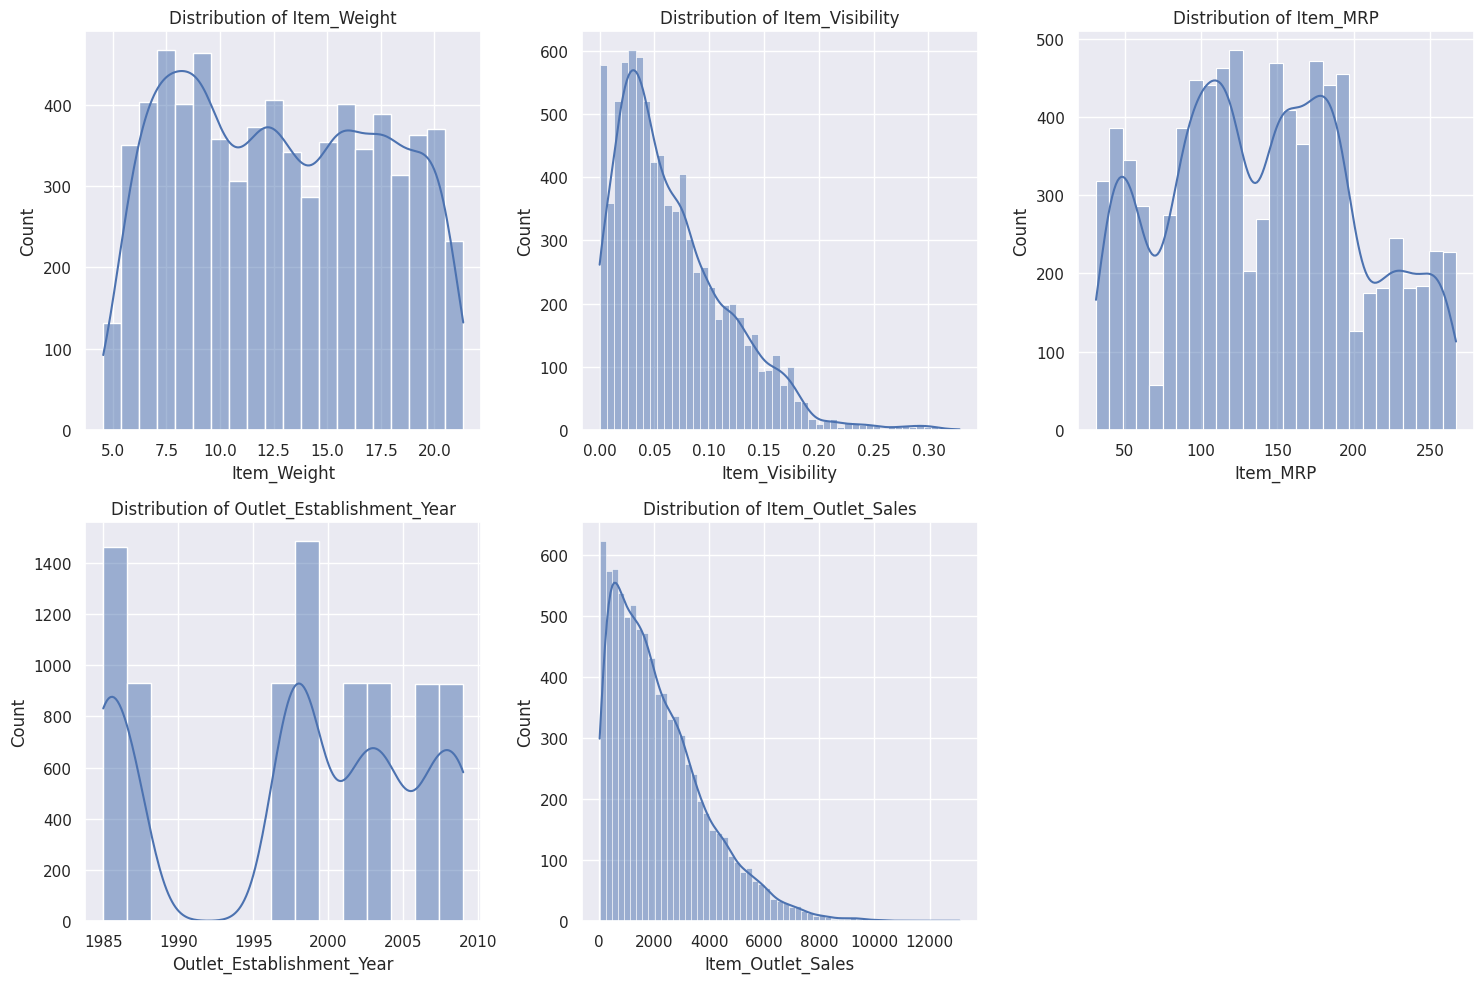

In [20]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(train_data[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig('plots/numerical_distributions.png')

In [19]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_Prefix
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FD
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC


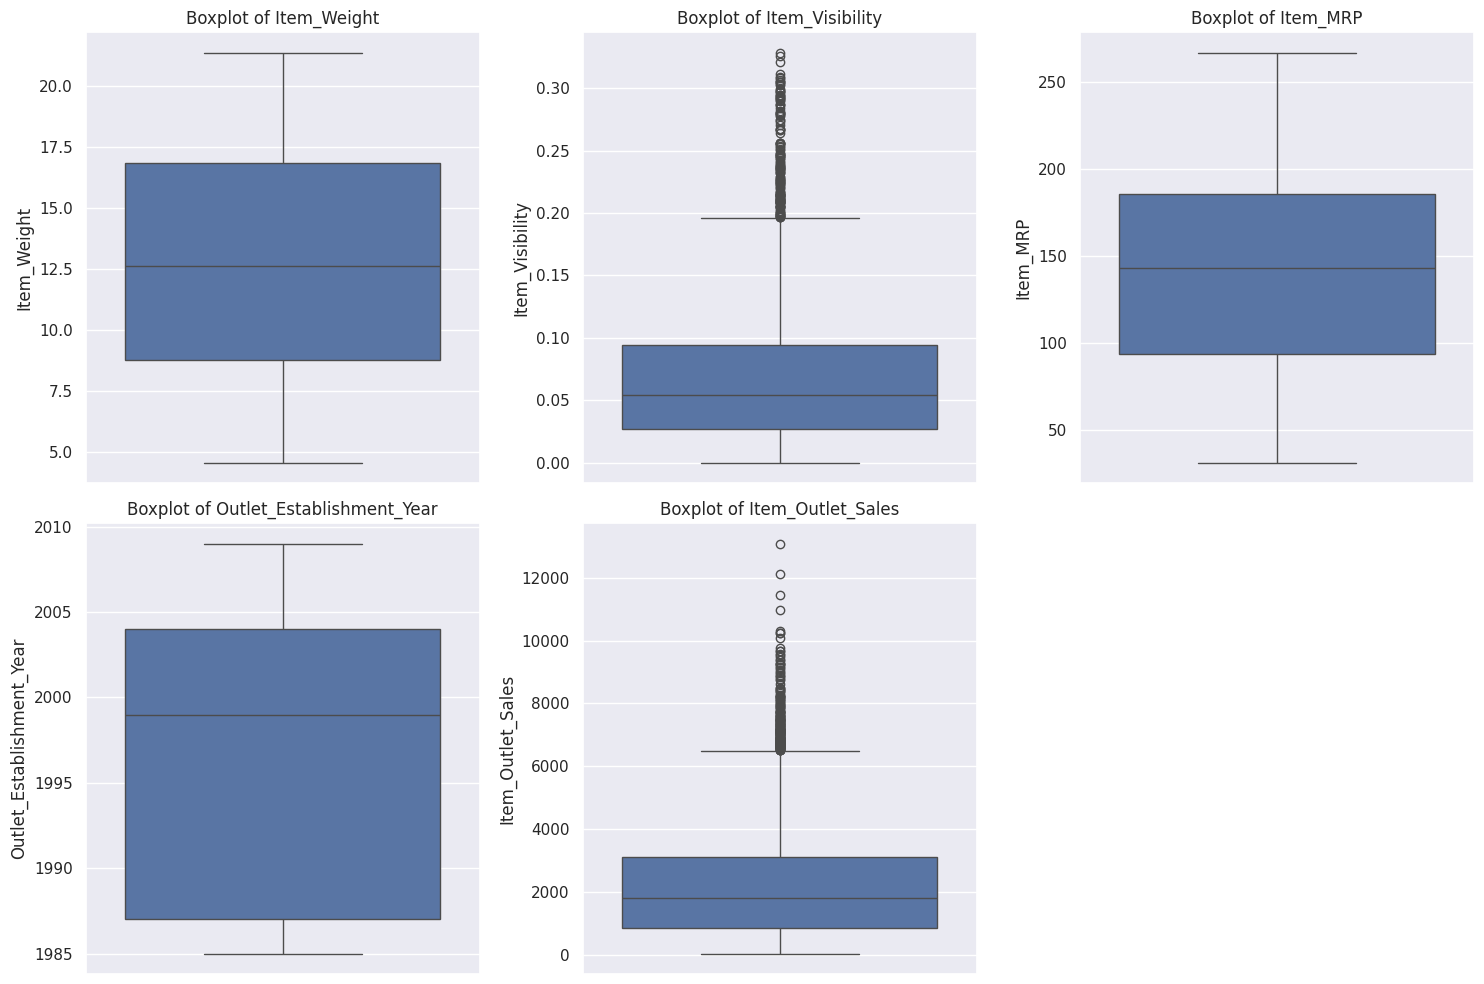

In [21]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=train_data[col].dropna())
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.savefig('plots/numerical_boxplots.png')

In [22]:
print("\n--- Item_Visibility Analysis ---")
print(f"Items with 0 visibility: {(train_data['Item_Visibility'] == 0).sum()}")
print(f"Percentage: {(train_data['Item_Visibility'] == 0).mean() * 100:.2f}%")


--- Item_Visibility Analysis ---
Items with 0 visibility: 526
Percentage: 6.17%


In [23]:
current_year = 2013  # As mentioned in the problem statement
train_data['Outlet_Age'] = current_year - train_data['Outlet_Establishment_Year']
train_data['Outlet_Age'] = current_year - train_data['Outlet_Establishment_Year']

In [24]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_Prefix,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FD,15
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,26


In [25]:
age_sales = train_data.groupby('Outlet_Age')['Item_Outlet_Sales'].agg(['mean', 'count'])
age_sales

,mean,count
Outlet_Age,,
4,1995.498739,928
6,2340.675263,926
9,2438.841866,930
11,2192.384798,929
14,2348.354635,930
15,339.351662,555
16,2277.844267,930
26,2298.995256,932
28,2483.677474,1463


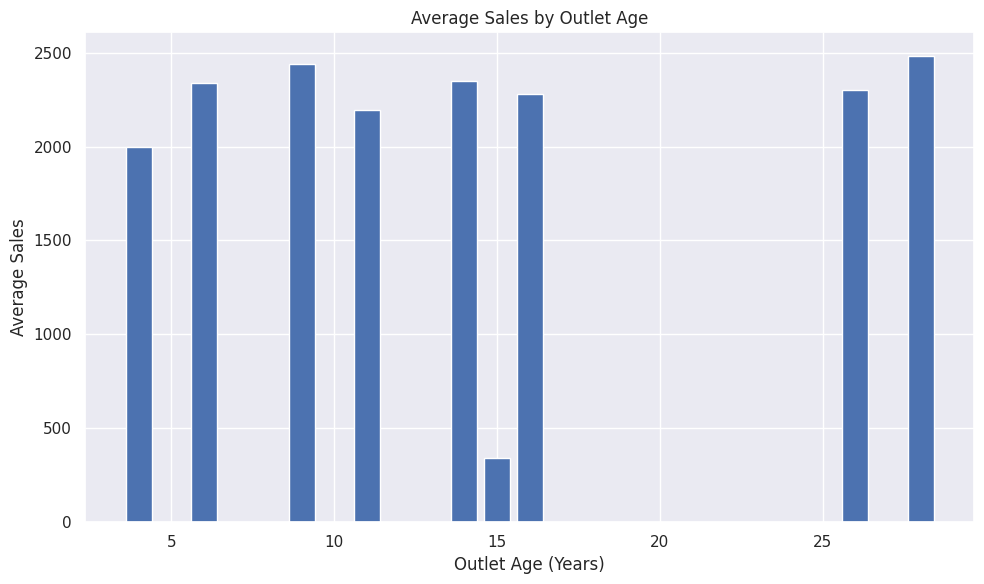

In [26]:
plt.figure(figsize=(10, 6))
plt.bar(age_sales.index, age_sales['mean'])
plt.xlabel('Outlet Age (Years)')
plt.ylabel('Average Sales')
plt.title('Average Sales by Outlet Age')
plt.tight_layout()
plt.savefig('plots/sales_by_age.png')


--- Target Variable Analysis ---
count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64


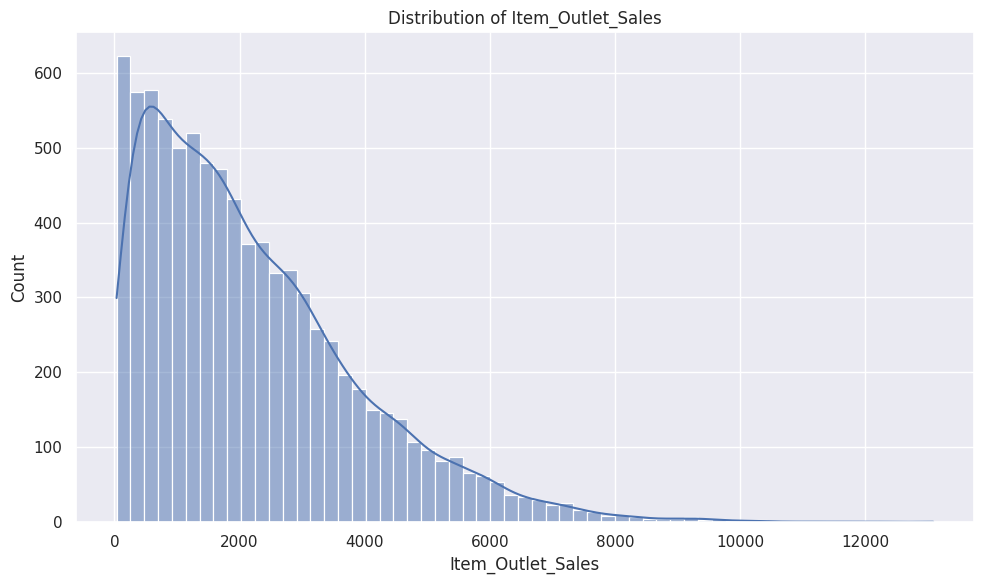

In [27]:
print("\n--- Target Variable Analysis ---")
print(train_data['Item_Outlet_Sales'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(train_data['Item_Outlet_Sales'], kde=True)
plt.title('Distribution of Item_Outlet_Sales')
plt.tight_layout()
plt.savefig('plots/sales_distribution.png')

In [29]:
from scipy import stats

_, p_value = stats.normaltest(train_data['Item_Outlet_Sales'])
print(f"Normality test p-value: {p_value:.4f}")
if p_value < 0.05:
    print("Sales distribution is not normal")
else:
    print("Sales distribution is approximately normal")

Normality test p-value: 0.0000
Sales distribution is not normal


Bivariate Analysis

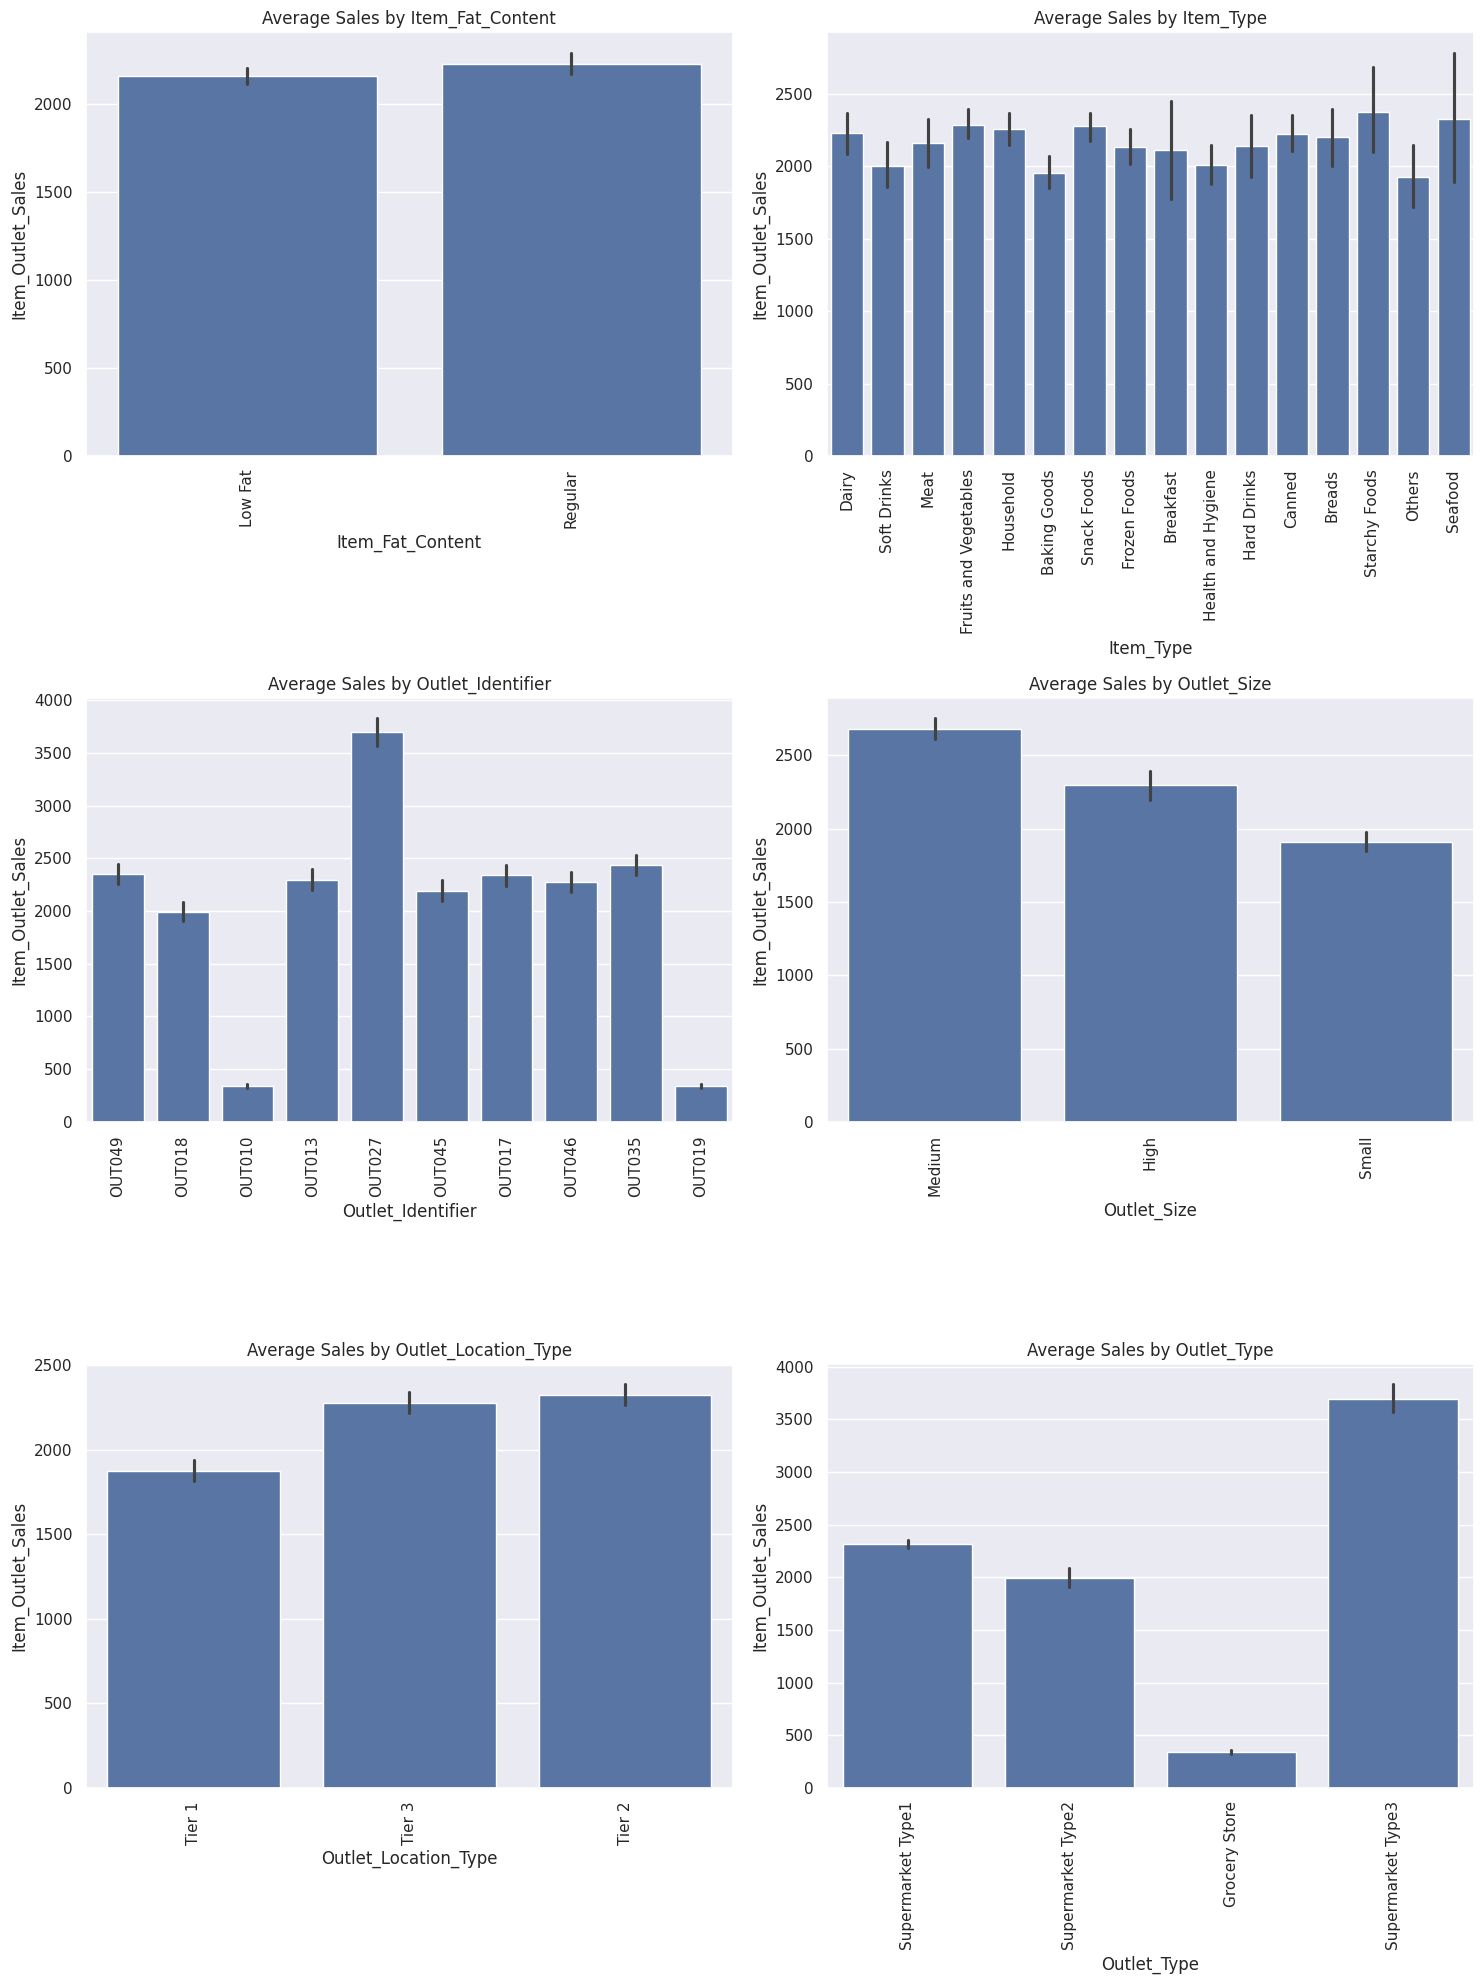

In [30]:
plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 2, i+1)
    sns.barplot(x=col, y='Item_Outlet_Sales', data=train_data)
    plt.title(f'Average Sales by {col}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('plots/categorical_vs_sales.png')

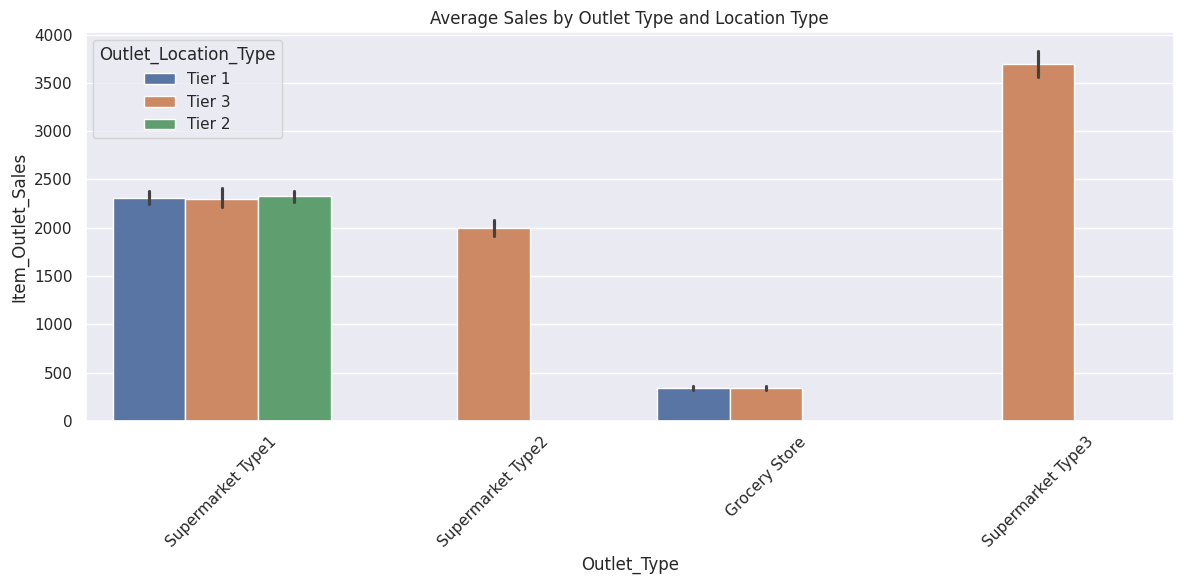

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Location_Type', data=train_data)
plt.title('Average Sales by Outlet Type and Location Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('plots/outlet_type_location_sales.png')

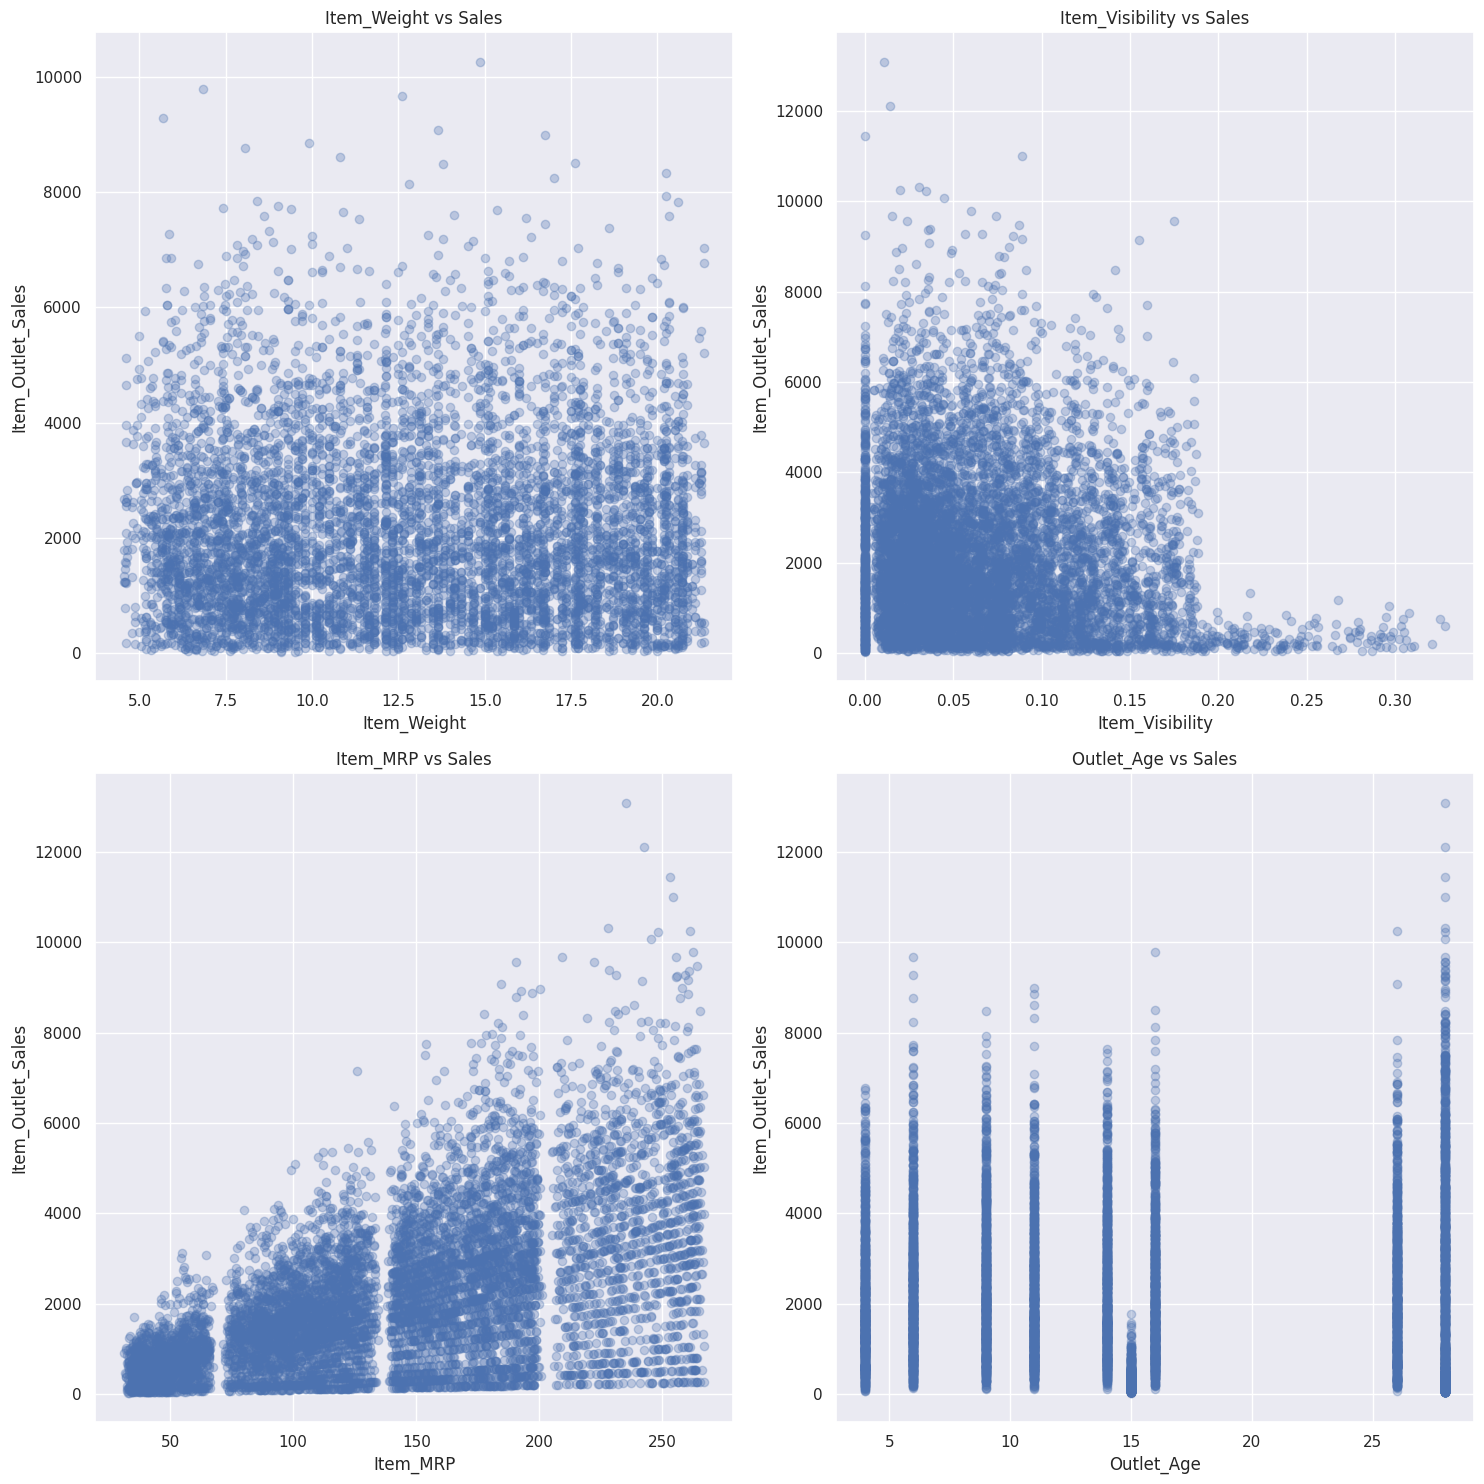

In [33]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age']):
    plt.subplot(2, 2, i+1)
    plt.scatter(train_data[col], train_data['Item_Outlet_Sales'], alpha=0.3)
    plt.title(f'{col} vs Sales')
    plt.xlabel(col)
    plt.ylabel('Item_Outlet_Sales')
plt.tight_layout()
plt.savefig('plots/numerical_vs_sales.png')

In [34]:
correlations = train_data[['Item_Weight', 'Item_Visibility', 'Item_MRP', 
                     'Outlet_Age', 'Item_Outlet_Sales']].corr()
correlations

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,-0.005020,0.567574
Outlet_Age,0.011588,0.074834,-0.005020,1.000000,0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,0.049135,1.000000


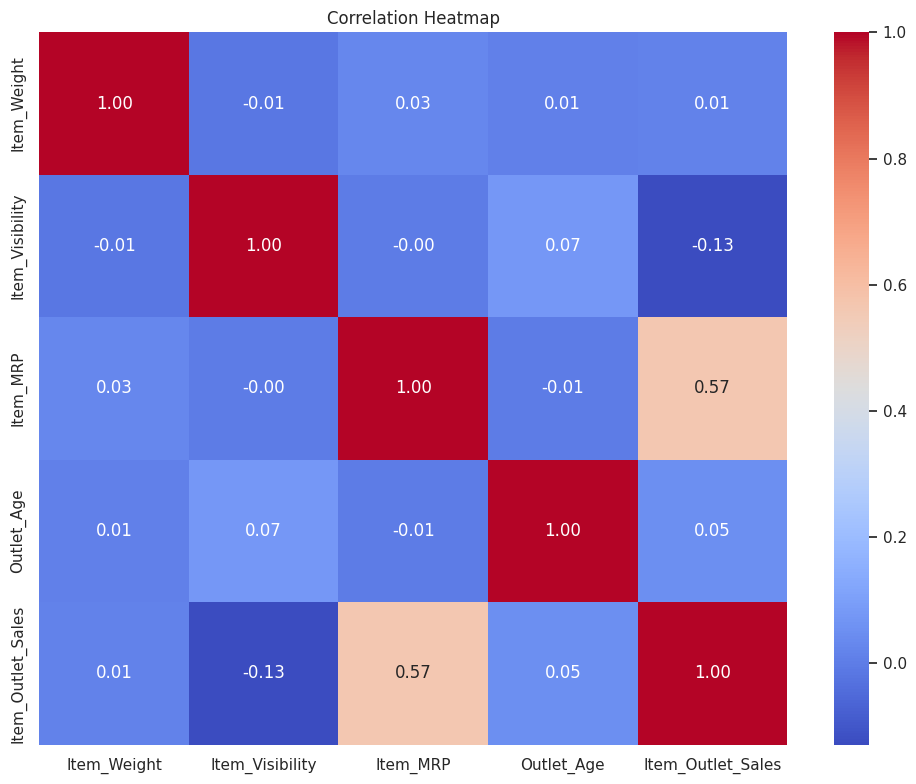

In [35]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig('plots/correlation_heatmap.png')

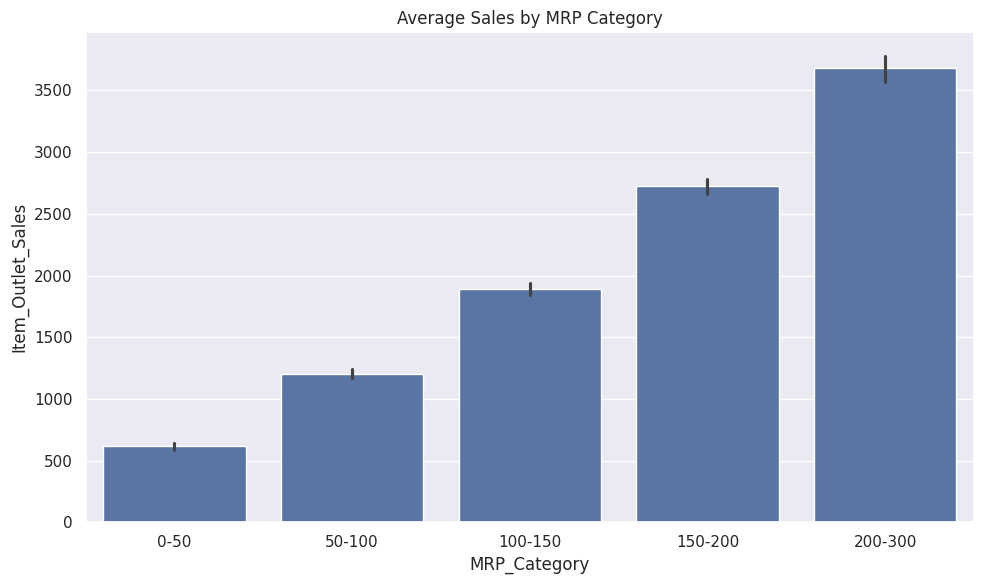

In [36]:
train_data['MRP_Category'] = pd.cut(train_data['Item_MRP'], 
                             bins=[0, 50, 100, 150, 200, 300],
                             labels=['0-50', '50-100', '100-150', '150-200', '200-300'])

plt.figure(figsize=(10, 6))
sns.barplot(x='MRP_Category', y='Item_Outlet_Sales', data=train_data)
plt.title('Average Sales by MRP Category')
plt.tight_layout()
plt.savefig('plots/sales_by_mrp_category.png')